In [20]:
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
COLORS = {
    'green': '#009e73',
    'blue': '#0072b2',
    'yellow': '#f1e443',
    'orange': '#e69f03',
    'red': '#d55f00',
    'purple': '#cc79a7'
}

In [5]:
import builtins
import csv
import numpy as np

def plot_latencies(filename):
    read_latencies = []
    write_latencies = []
    with builtins.open(filename, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            if row['type'] == 'READ':
                read_latencies.append(float(row['time']))
            elif row['type'] == 'UPLOAD':
                write_latencies.append(float(row['time']))
    
    print(f"{len(read_latencies)} read requests, mean latency {np.mean(read_latencies)} (std. dev. {np.std(read_latencies)})")
    print(f"{len(write_latencies)} upload requests, mean latency {np.mean(write_latencies)} (std. dev. {np.std(write_latencies)})")
    
    plt.plot(read_latencies, label='Read Latencies')
    plt.plot(write_latencies, label='Write Latencies')

In [71]:
import builtins
import csv
import numpy as np

def plot_latency_comparison(baseline_file, skydentity_file, operation, cloud="gcp", workload="", ylim=22):
    if operation not in ['READ', 'UPLOAD']:
        raise ValueError("operation must be either 'READ' or 'UPLOAD'")
    baseline_latencies = []
    with builtins.open(baseline_file, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            if row['type'] == operation:
                baseline_latencies.append(float(row['time']))
    
    skydentity_latencies = []
    with builtins.open(skydentity_file, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            if row['type'] == operation:
                skydentity_latencies.append(float(row['time']))
    
    print(f"Baseline: {len(baseline_latencies)} {operation} requests, mean latency {np.mean(baseline_latencies)} (std. dev. {np.std(baseline_latencies)})")
    print(f"Skydentity: {len(skydentity_latencies)} {operation} requests, mean latency {np.mean(skydentity_latencies)} (std. dev. {np.std(skydentity_latencies)})")
    
    plt.plot(baseline_latencies, label='Baseline', color=COLORS['blue'], linewidth=2)
    plt.plot(skydentity_latencies, label='CloudGate', color=COLORS['orange'], linewidth=2)
    plt.ylim(0, ylim)
    plt.ylabel('Latency (s)')
    plt.xlabel('Request #')
    plt.legend()
    plt.title(f'{operation} Latencies')
    plt.savefig(f"aether-plots/{operation}_{cloud}_{workload}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

48 read requests, mean latency 1.9800971776467122 (std. dev. 0.10579213636032354)
48 upload requests, mean latency 3.0668539643532617 (std. dev. 0.15010042403169452)


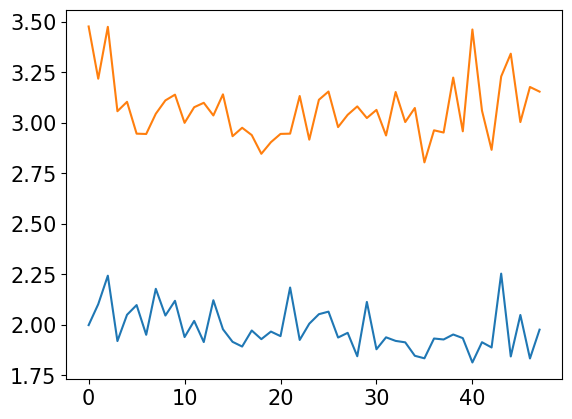

In [15]:
plot_latencies("logs/baseline/interleave-buckets-16-direct-data-2.csv")

48 read requests, mean latency 2.884137575688328 (std. dev. 3.4036214616727283)
48 upload requests, mean latency 4.096158030937052 (std. dev. 3.741526661155335)


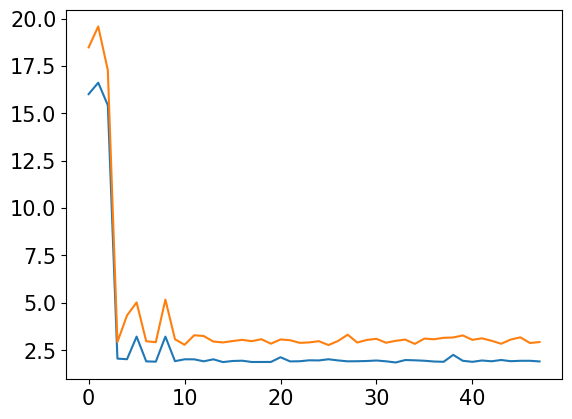

In [17]:
plot_latencies("logs/skydentity/interleave-buckets-16-skydentity-data-2.csv")

Baseline: 48 READ requests, mean latency 1.9800971776467122 (std. dev. 0.10579213636032354)
Skydentity: 48 READ requests, mean latency 2.8108920305427696 (std. dev. 2.808611867450822)


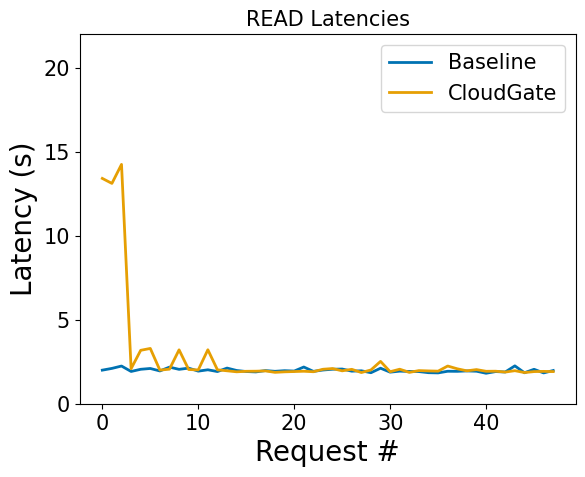

In [79]:
plot_latency_comparison("logs/baseline/interleave-buckets-16-direct-data-2.csv", 
                        "logs/gcp-updated/interleave-buckets-16-skydentity-data-3.csv", 
                        'READ', workload="interleave-buckets")

Baseline: 48 UPLOAD requests, mean latency 3.0668539643532617 (std. dev. 0.15010042403169452)
Skydentity: 48 UPLOAD requests, mean latency 4.07005073878948 (std. dev. 3.256402694182956)


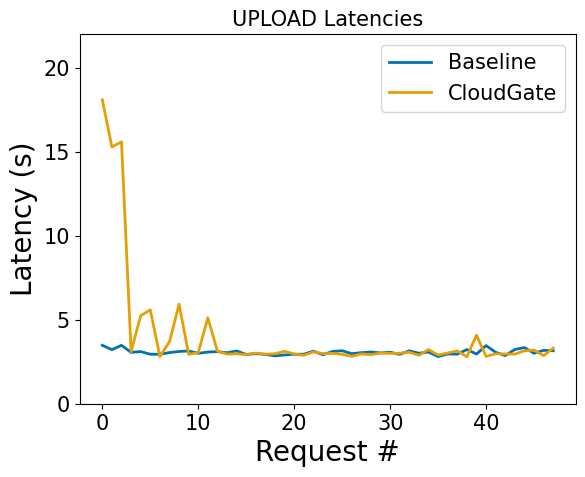

In [67]:
plot_latency_comparison("logs/baseline/interleave-buckets-16-direct-data-2.csv", 
                        "logs/gcp-updated/interleave-buckets-16-skydentity-data-1.csv", 
                        'UPLOAD', workload="interleave-buckets")

Baseline: 64 READ requests, mean latency 1.9899619102961879 (std. dev. 0.10790943564392674)
Skydentity: 64 READ requests, mean latency 2.2221816470450904 (std. dev. 1.5891379368219851)


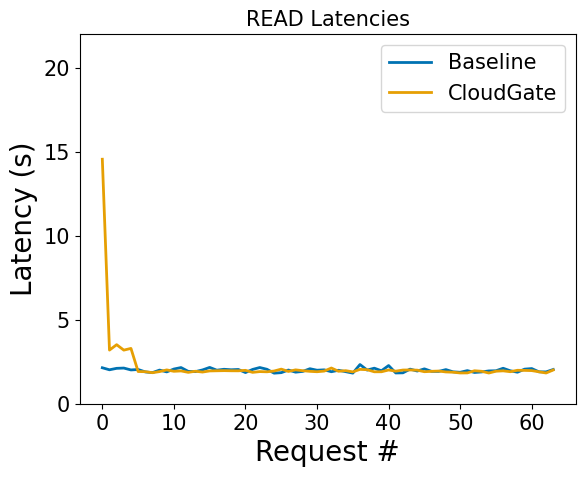

In [63]:
plot_latency_comparison("logs/baseline/interleave-read-write-64-direct-data-2.csv", 
                        "logs/gcp-updated/interleave-read-write-64-skydentity-data-2.csv", 
                        'READ', workload="interleave-read-write")

Baseline: 64 UPLOAD requests, mean latency 3.3331972145465443 (std. dev. 0.22068016133046164)
Skydentity: 64 UPLOAD requests, mean latency 3.57442620224856 (std. dev. 2.2492468451071392)


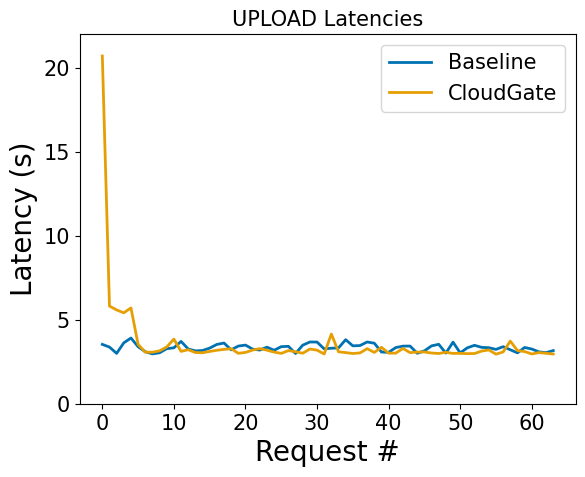

In [62]:
plot_latency_comparison("logs/baseline/interleave-read-write-64-direct-data-2.csv", 
                        "logs/gcp-updated/interleave-read-write-64-skydentity-data-2.csv", 
                        'UPLOAD', workload="interleave-read-write")

In [43]:
import builtins
import csv
import numpy as np

def plot_latency_comparison_concurrent(baseline_file, skydentity_file, cloud="gcp"):
    baseline_throughputs = []
    baseline_latencies = []
    with builtins.open(baseline_file, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            baseline_latencies.append(float(row['time']))
    
    skydentity_latencies = []
    with builtins.open(skydentity_file, 'r') as f:
        csvreader = csv.DictReader(f, delimiter=',')
        for row in csvreader:
            skydentity_latencies.append(float(row['time']))
    
    print(f"Baseline: {len(baseline_latencies)} requests, mean latency {np.mean(baseline_latencies)} (std. dev. {np.std(baseline_latencies)})")
    print(f"Skydentity: {len(skydentity_latencies)} requests, mean latency {np.mean(skydentity_latencies)} (std. dev. {np.std(skydentity_latencies)})")
    
    plt.plot(baseline_latencies, label='Baseline', color=COLORS['blue'], linewidth=2)
    plt.plot(skydentity_latencies, label='CloudGate', color=COLORS['orange'], linewidth=2)
    #plt.ylim(0, 22)
    plt.ylabel('Latency (s)')
    plt.xlabel('Request #')
    plt.legend()
    plt.savefig(f"aether-plots/concurrent_{cloud}.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    #plt.title(f'{operation} Latencies')

Baseline: 96 requests, mean latency 8.907612977228988 (std. dev. 2.7209627196081954)
Skydentity: 96 requests, mean latency 17.220384635698185 (std. dev. 16.59171952258504)


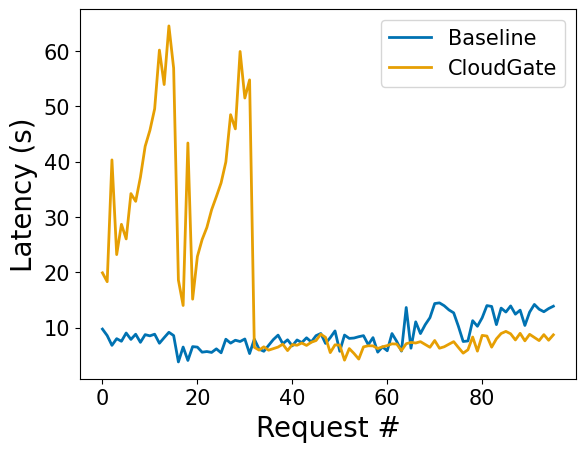

In [61]:
plot_latency_comparison_concurrent("logs/baseline/concurrent-buckets-16-direct-data-2.csv", 
                                   "logs/gcp-updated/concurrent-buckets-16-skydentity-data-2.csv")

In [51]:
from collections import defaultdict
from datetime import datetime

def get_throughput(filename):
    with builtins.open(filename, 'r') as f:
        lines = f.readlines()
        tputs = defaultdict(list)
        idx = 0
        while idx < len(lines):
            line = lines[idx]
            reqs = 0
            type = ""
            if "===== SENDING " in line:
                type = line.split(" ")[7]
                print(type)
            else:
                idx += 1
                continue
            start_string = lines[idx + 1].split(" ")[1].strip()
            start = datetime.strptime(start_string, '%H:%M:%S,%f')
            if "seconds" in lines[idx + 32]:
                end_string = lines[idx + 32].split(" ")[1].strip() 
                reqs = 32
                idx += 32
            else:
                end_string = lines[idx + 64].split(" ")[1].strip()
                reqs = 64
                idx += 64
            end = datetime.strptime(end_string, '%H:%M:%S,%f')
            tputs[type].append(float(reqs) / (end-start).total_seconds())
    return tputs

In [52]:
get_throughput("logs/baseline/concurrent-buckets-16-direct-results-2.log")
get_throughput("logs/skydentity/concurrent-buckets-16-skydentity-results-2.log")

WRITES
READS
WRITES
READS
READ/WRITES
WRITES
READS
WRITES
READS
READ/WRITES


defaultdict(list,
            {'WRITES': [0.32637741468290393, 3.7343914108997547],
             'READS': [0.30249749494262, 4.08111210304808],
             'READ/WRITES': [5.91551899436177]})

In [58]:
def plot_tputs(baseline_fname, skydentity_fname, cloud="gcp"):
    baseline_tput_dict = get_throughput(baseline_fname)
    skydentity_tput_dict = get_throughput(skydentity_fname)
    
    print(baseline_tput_dict)

    baseline_tputs = []
    skydentity_tputs = []
    all_events = []
    events = []
    for event, tput in baseline_tput_dict.items():
        for tp in tput:
            baseline_tputs.append(tp)
            all_events.append(event)
        events.append(event)
    for event in events:
        for tp in skydentity_tput_dict[event]:
            skydentity_tputs.append(tp)

    x = np.arange(len(all_events))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 2))
    ax.bar(x - width/2, baseline_tputs, width, label='Baseline', color=COLORS['blue'])
    ax.bar(x + width/2, skydentity_tputs, width, label='w/ CloudGate', color=COLORS['orange'])
    ax.set_ylabel('Req/s')
    ax.set_title(f"Throughput")
    ax.set_xticks(x)
    ax.set_xticklabels(all_events)
    plt.legend(loc="upper left", ncols=2)
    plt.savefig(f"aether-plots/concurrent_throughput_{cloud}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

WRITES
READS
WRITES
READS
READ/WRITES
WRITES
READS
WRITES
READS
READ/WRITES
defaultdict(<class 'list'>, {'WRITES': [3.2925198065644614, 3.518416712479384], 'READS': [3.961376578360981, 3.4046175125013303], 'READ/WRITES': [4.402558987411433]})


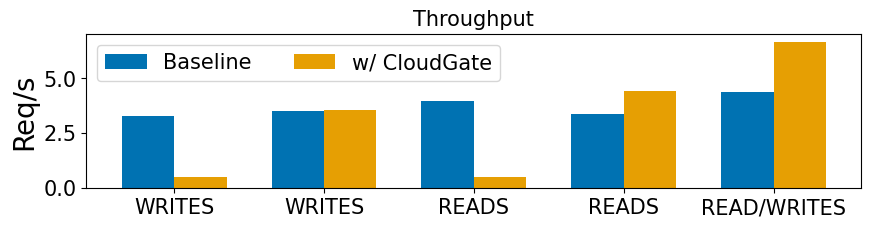

In [60]:
plot_tputs("logs/baseline/concurrent-buckets-16-direct-results-2.log", 
           "logs/gcp-updated/concurrent-buckets-16-skydentity-results-2.log")

Baseline: 120 READ requests, mean latency 0.46402837503349775 (std. dev. 0.11236015047604378)
Skydentity: 120 READ requests, mean latency 0.8721059586418657 (std. dev. 0.18593033833553424)


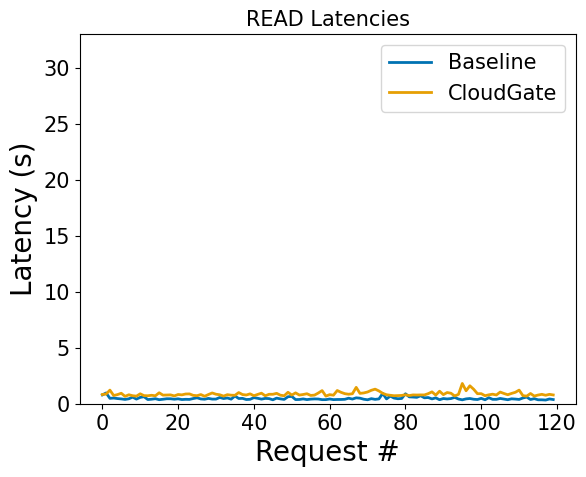

In [77]:
plot_latency_comparison("logs/azure/interleave-buckets/baseline-interleave-buckets-data-1.csv",
                        "logs/azure/interleave-buckets/skydentity-interleave-buckets-data-1.csv",
                        'READ', 'azure', "interleave-buckets", ylim=33)

Baseline: 120 UPLOAD requests, mean latency 0.8570730523836877 (std. dev. 0.1370272643132826)
Skydentity: 120 UPLOAD requests, mean latency 1.3983340240761513 (std. dev. 2.7189370831980244)


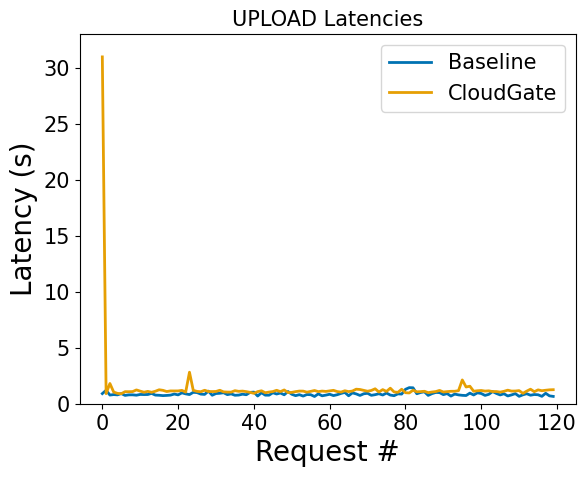

In [73]:
plot_latency_comparison("logs/azure/interleave-buckets/baseline-interleave-buckets-data-1.csv",
                        "logs/azure/interleave-buckets/skydentity-interleave-buckets-data-1.csv",
                        'UPLOAD', 'azure', "interleave-buckets", ylim=33)

Baseline: 40 READ requests, mean latency 0.4228040243993746 (std. dev. 0.07941995962430899)
Skydentity: 40 READ requests, mean latency 0.8548531858516071 (std. dev. 0.1915052755312952)


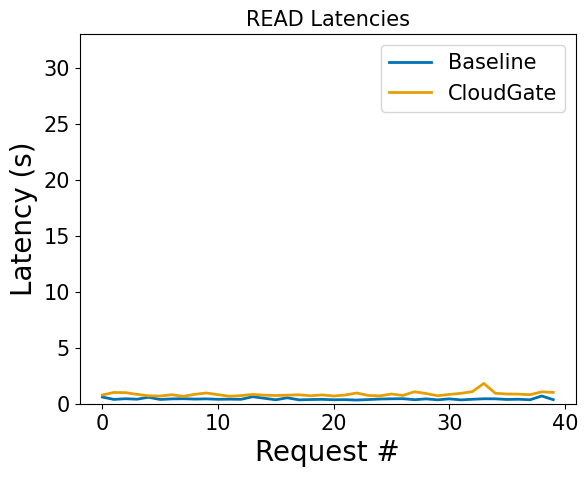

In [76]:
plot_latency_comparison("logs/azure/interleave-read-write/baseline-interleave-read-write-data-1.csv",
                        "logs/azure/interleave-read-write/skydentity-interleave-read-write-data-1.csv",
                        'READ', 'azure', "interleave-read-write", ylim=33)

Baseline: 40 UPLOAD requests, mean latency 0.7543405343243649 (std. dev. 0.06712732443408086)
Skydentity: 40 UPLOAD requests, mean latency 1.7290710743491218 (std. dev. 4.273142057189103)


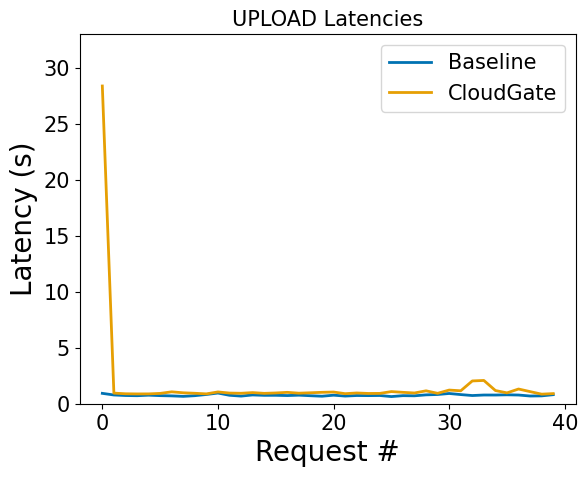

In [75]:
plot_latency_comparison("logs/azure/interleave-read-write/baseline-interleave-read-write-data-1.csv",
                        "logs/azure/interleave-read-write/skydentity-interleave-read-write-data-1.csv",
                        'UPLOAD', 'azure', "interleave-read-write", ylim=33)

Baseline: 96 requests, mean latency 3.515962349364296 (std. dev. 1.4895624226473334)
Skydentity: 96 requests, mean latency 8.23126780048915 (std. dev. 7.90271619404717)


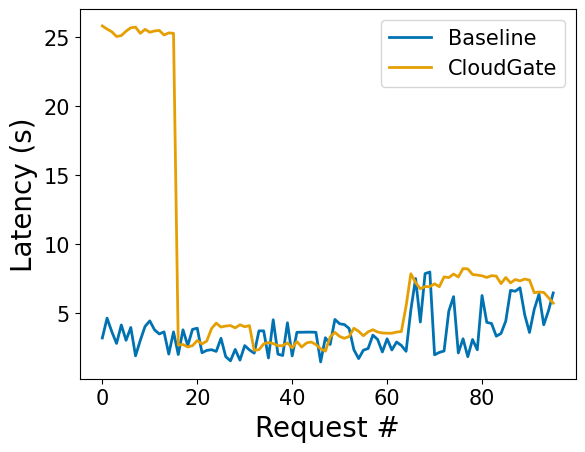

In [47]:
plot_latency_comparison_concurrent("logs/azure/concurrent-buckets/baseline-concurrent-buckets-data-1.csv",
                        "logs/azure/concurrent-buckets/skydentity-concurrent-buckets-data-3.csv",
                        'azure')